In [26]:
import numpy as np
import keras
from keras import backend as k
from keras.layers import Dense, Input, Lambda, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from IPython.display import Image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
IMAGE_SIZE = [224, 224] 
train_path = '/content/drive/My Drive/DataSet/Data_face/Data-Set-Face-20200730T084950Z-001/Data-Set-Face/train' 
valid_path = '/content/drive/My Drive/DataSet/Data_face/Data-Set-Face-20200730T084950Z-001/Data-Set-Face/valid'

In [28]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
vgg. summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
for layer in vgg.layers:
      layer.trainable = False

In [31]:
folders = glob('/content/drive/My Drive/DataSet/Data_face/Data-Set-Face-20200730T084950Z-001/Data-Set-Face/train/*') 

In [32]:
x = Flatten()(vgg.output)
predictions = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=predictions)

In [33]:
model.compile(Adam(lr=.00005), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=5,
        )
validation_batches = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=5,
        )

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [35]:
history = model.fit_generator(train_batches, steps_per_epoch=120, 
                                      validation_data=validation_batches, validation_steps=60, epochs=10, verbose=2) 

Epoch 1/10
 - 21s - loss: 0.1961 - accuracy: 0.9600 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 2/10
 - 20s - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 3/10
 - 20s - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 4/10
 - 20s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/10
 - 20s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
 - 20s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 7/10
 - 20s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 8/10
 - 20s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 9/10
 - 20s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 10/10
 - 20s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000


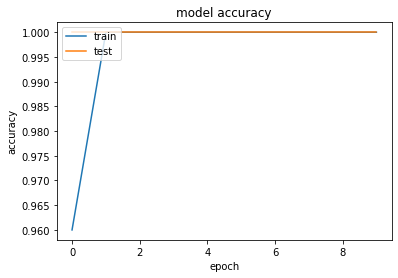

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

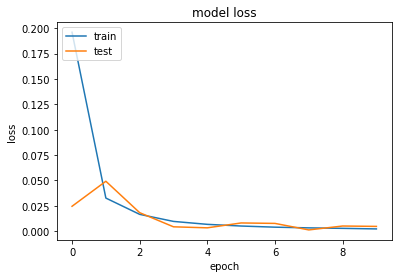

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
from keras.models import load_model
model.save('faceVGG16.h5')